<a href="https://colab.research.google.com/github/NehaSontakk/BATH-Prokka-Comparison/blob/main/Annotation_Name_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install gffpandas

In [39]:
!sudo apt-get install bedops

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bedops is already the newest version (2.4.40+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [40]:
!pip install biopython

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import gffpandas.gffpandas as gffpd
from Bio import SeqIO

ModuleNotFoundError: No module named 'gffpandas'

In [42]:
alignments = pd.read_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/Alignment_Overlaps_Unique_Bedmap_Output.xlsx")

In [43]:
alignment_overlaps = alignments[alignments['label']=="BATH and Prokka Annotated"]

### Annotation Name Comparison

In [44]:
alignment_overlaps['Annotation_Match'] = 'No'

for index, row in alignment_overlaps.iterrows():
    prokka_protein = ""
    bath_protein = ""
    if row['label'] == "BATH and Prokka Annotated":
        prokka_protein = row['Prokka'].split(":")[-1]
        bath_protein = row['BATH'].split("\t")[-3]
        if prokka_protein == bath_protein:
            alignment_overlaps.loc[index, 'Annotation_Match'] = 'Yes'

<ipython-input-44-357b807f7606>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alignment_overlaps['Annotation_Match'] = 'No'


In [45]:
alignment_overlaps

,Prokka,BATH,label,Annotation_Match
443,k127_1013475\t28\t825\tCKDIDOFJ_00001\t+\tab i...,k127_1013475\t4\t822\tMF_01397\t+\t0,BATH and Prokka Annotated,No
444,k127_1013475\t904\t2010\tCKDIDOFJ_00002\t+\tab...,k127_1013475\t985\t2001\tMF_01350\t+\t0,BATH and Prokka Annotated,No
445,k127_1013475\t2108\t3613\tCKDIDOFJ_00003\t+\ta...,k127_1013475\t2114\t3589\tMF_01347\t+\t0,BATH and Prokka Annotated,No
446,k127_1013475\t3678\t3914\tCKDIDOFJ_00004\t+\ta...,k127_1013475\t3675\t3908\tMF_00530\t+\t0,BATH and Prokka Annotated,Yes
447,k127_1013475\t3944\t5182\tCKDIDOFJ_00005\t+\ta...,k127_1013475\t4421\t5059\tMF_01393\t+\t0,BATH and Prokka Annotated,Yes
...,...,...,...,...
944,k127_795063\t28173\t29489\tCKDIDOFJ_01702\t+\t...,k127_795063\t28182\t29378\tP9WFP3\t+\t0,BATH and Prokka Annotated,No
945,k127_795063\t36632\t37219\tCKDIDOFJ_01711\t+\t...,k127_795063\t36635\t37210\tQ46948\t+\t0,BATH and Prokka Annotated,Yes
947,k127_795063\t45264\t46460\tCKDIDOFJ_01720\t+\t...,k127_795063\t45273\t46430\tP0DPE4\t+\t0,BATH and Prokka Annotated,Yes
948,k127_795063\t46484\t47611\tCKDIDOFJ_01721\t+\t...,k127_795063\t46493\t47560\tP06710\t+\t0,BATH and Prokka Annotated,Yes


In [46]:
alignment_overlaps['Annotation_Match'].value_counts()

Annotation_Match
No     238
Yes    195
Name: count, dtype: int64

### COG Level Overlap

In [47]:
#Retrieve the right COGs for each dataframe
import requests

def get_eggnog_link(protein_name):
  if protein_name != "":
    url = f"https://rest.uniprot.org/uniprotkb/search?query={protein_name}&format=json"
    #print(url)
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        #print(data.get(""))
        for result in data.get('results', []):
            #print(result)
            cross_refs = result.get("uniProtKBCrossReferences", [])
            #print(cross_refs)
            for ref in cross_refs:
                if ref.get('database') == 'eggNOG':
                    return ref.get('id')
    except requests.RequestException as e:
        print(f"Request failed: {e}")
  else:
    return None


### !Uncomment if you are doing a new set

In [48]:
alignment_overlaps['Prokka COGs'] = alignment_overlaps['Prokka'].apply(lambda x: get_eggnog_link(x.split(":")[-1]))

<ipython-input-48-610285e70e5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alignment_overlaps['Prokka COGs'] = alignment_overlaps['Prokka'].apply(lambda x: get_eggnog_link(x.split(":")[-1]))


In [49]:
#Hasn't been working well
#alignment_overlaps['BATH COGs'] = alignment_overlaps['BATH'].apply(lambda x: get_eggnog_link(x.split('\t')[-3]))

In [50]:
import requests
import re  # Import the regular expressions module

def get_eggnog_link(protein_name):
    if protein_name != "":
        url = f"https://rest.uniprot.org/uniprotkb/search?query={protein_name}&format=json"
        try:
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()
            for result in data.get('results', []):
                cross_refs = result.get("uniProtKBCrossReferences", [])
                for ref in cross_refs:
                    if ref.get('database') == 'eggNOG':
                        return ref.get('id')
        except requests.RequestException as e:
            print(f"Request failed: {e}")
    return None

def debug_split(x):
    parts = re.split(r'\s+', x)  # This uses regular expressions to split by any whitespace
    print(parts)  # This will print the split results
    if len(parts) >= 3:
        return get_eggnog_link(parts[-3])
    else:
        print(f"Not enough parts in the list: {parts}")  # Optional: Print an error or warning
        return None

alignment_overlaps['BATH COGs'] = alignment_overlaps['BATH'].apply(debug_split)


['k127_1013475', '4', '822', 'MF_01397', '+', '0']
['k127_1013475', '985', '2001', 'MF_01350', '+', '0']
['k127_1013475', '2114', '3589', 'MF_01347', '+', '0']
['k127_1013475', '3675', '3908', 'MF_00530', '+', '0']
['k127_1013475', '4421', '5059', 'MF_01393', '+', '0']
['k127_1013475', '5287', '5502', 'MF_01396', '+', '0']
['k127_1013475', '5724', '6218', 'MF_01398', '+', '0']
['k127_1013475', '6298', '6849', 'MF_01416', '+', '0']
['k127_1013475', '6961', '8529', 'MF_01346', '+', '0']
['k127_1013475', '8593', '9483', 'MF_00815', '+', '0']
['k127_1013475', '9582', '10058', 'MF_01351', '+', '0']
['k127_1013475', '11039', '11341', 'MF_01456', '+', '0']
['k127_1013475', '11569', '13290', 'P9WIW1', '+', '0']
['k127_1013475', '13369', '14811', 'MF_00491', '+', '0']
['k127_1013475', '14991', '16400', 'MF_00445', '+', '0']
['k127_1013475', '23186', '24247', 'P77364', '+', '0']
['k127_1013475', '51206', '52066', 'P71011', '+', '0']
['k127_1013475', '88237', '89142', 'Q9X2A2', '+', '0']
['k127_1

<ipython-input-50-4a320f6ab3b4>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alignment_overlaps['BATH COGs'] = alignment_overlaps['BATH'].apply(debug_split)


In [51]:
alignment_overlaps.to_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/Alignment_Overlaps_Unique_Bedmap_COGs.xlsx")

In [42]:
alignment_overlaps = pd.read_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/Alignment_Overlaps_Unique_Bedmap_COGs.xlsx")

In [44]:
import re  # Make sure to import the regular expressions module

alignment_overlaps['Name_or_COG_Match'] = 'No'

for index, row in alignment_overlaps.iterrows():
    prokka_COG = row['Prokka COGs']
    bath_COG = row['BATH COGs']
    prokka_protein = row['Prokka'].split(":")[-1]
    bath_parts = re.split(r'\s+', row['BATH'])  # This will split by any whitespace
    if len(bath_parts) >= 3:
        bath_protein = bath_parts[-3]
        if (prokka_COG == bath_COG) or (prokka_protein == bath_protein):
            alignment_overlaps.loc[index, 'Name_or_COG_Match'] = 'Yes'
    else:
        print(f"Not enough parts in the list for index {index}: {bath_parts}")


In [45]:
alignment_overlaps['Name_or_COG_Match'].value_counts()

Name_or_COG_Match
Yes    283
No     150
Name: count, dtype: int64

In [46]:
#How many because there are no annotations?

print(alignment_overlaps[(alignment_overlaps['Name_or_COG_Match'] == "No") & (alignment_overlaps['Prokka COGs'].isna()) & (alignment_overlaps['BATH COGs'].isna())].shape[0])

bath_none_count = alignment_overlaps[(alignment_overlaps['Name_or_COG_Match'] == "No") & (alignment_overlaps['BATH COGs'].isna())].shape[0]

prokka_none_count = alignment_overlaps[(alignment_overlaps['Name_or_COG_Match'] == "No") & (alignment_overlaps['Prokka COGs'].isna())].shape[0]

print(f"Number of rows with 'Name_or_COG_Match' == 'No' and no 'BATH COGs': {bath_none_count}")
print(f"Number of rows with 'Name_or_COG_Match' == 'No' and no 'Prokka COGs': {prokka_none_count}")


9
Number of rows with 'Name_or_COG_Match' == 'No' and no 'BATH COGs': 24
Number of rows with 'Name_or_COG_Match' == 'No' and no 'Prokka COGs': 64


In [47]:
import numpy as np
alignment_overlaps[(alignment_overlaps['Name_or_COG_Match'] == "No") & (alignment_overlaps['Prokka COGs'].isna())]['Name_or_COG_Match'] = np.nan
alignment_overlaps[(alignment_overlaps['Name_or_COG_Match'] == "No") & (alignment_overlaps['BATH COGs'].isna())]['Name_or_COG_Match'] = np.nan
alignment_overlaps[(alignment_overlaps['Name_or_COG_Match'] == "No") & (alignment_overlaps['Prokka COGs'].isna()) & (alignment_overlaps['BATH COGs'].isna())]['Name_or_COG_Match'] = np.nan

<ipython-input-47-f49203050431>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alignment_overlaps[(alignment_overlaps['Name_or_COG_Match'] == "No") & (alignment_overlaps['Prokka COGs'].isna())]['Name_or_COG_Match'] = np.nan
<ipython-input-47-f49203050431>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alignment_overlaps[(alignment_overlaps['Name_or_COG_Match'] == "No") & (alignment_overlaps['BATH COGs'].isna())]['Name_or_COG_Match'] = np.nan
<ipython-input-47-f49203050431>:4: SettingWithCopyWarning: 
A 

In [48]:
alignment_overlaps

,Unnamed: 0,Prokka,BATH,label,Annotation_Match,Prokka COGs,BATH COGs,Name_or_COG_Match
0,443,k127_1013475\t28\t825\tCKDIDOFJ_00001\t+\tab i...,k127_1013475\t4\t822\tMF_01397\t+\t0,BATH and Prokka Annotated,No,COG0649,COG0649,Yes
1,444,k127_1013475\t904\t2010\tCKDIDOFJ_00002\t+\tab...,k127_1013475\t985\t2001\tMF_01350\t+\t0,BATH and Prokka Annotated,No,COG1005,KOG4770,No
2,445,k127_1013475\t2108\t3613\tCKDIDOFJ_00003\t+\ta...,k127_1013475\t2114\t3589\tMF_01347\t+\t0,BATH and Prokka Annotated,No,COG0055,KOG1350,No
3,446,k127_1013475\t3678\t3914\tCKDIDOFJ_00004\t+\ta...,k127_1013475\t3675\t3908\tMF_00530\t+\t0,BATH and Prokka Annotated,Yes,KOG1758,KOG1758,Yes
4,447,k127_1013475\t3944\t5182\tCKDIDOFJ_00005\t+\ta...,k127_1013475\t4421\t5059\tMF_01393\t+\t0,BATH and Prokka Annotated,Yes,COG0356,COG0356,Yes
...,...,...,...,...,...,...,...,...
428,944,k127_795063\t28173\t29489\tCKDIDOFJ_01702\t+\t...,k127_795063\t28182\t29378\tP9WFP3\t+\t0,BATH and Prokka Annotated,No,COG4536,COG1253,No
429,945,k127_795063\t36632\t37219\tCKDIDOFJ_01711\t+\t...,k127_795063\t36635\t37210\tQ46948\t+\t0,BATH and Prokka Annotated,Yes,COG0693,COG0693,Yes
430,947,k127_795063\t45264\t46460\tCKDIDOFJ_01720\t+\t...,k127_795063\t45273\t46430\tP0DPE4\t+\t0,BATH and Prokka Annotated,Yes,NaN,NaN,Yes
431,948,k127_795063\t46484\t47611\tCKDIDOFJ_01721\t+\t...,k127_795063\t46493\t47560\tP06710\t+\t0,BATH and Prokka Annotated,Yes,COG2812,COG2812,Yes


In [2]:
!pip install squarify


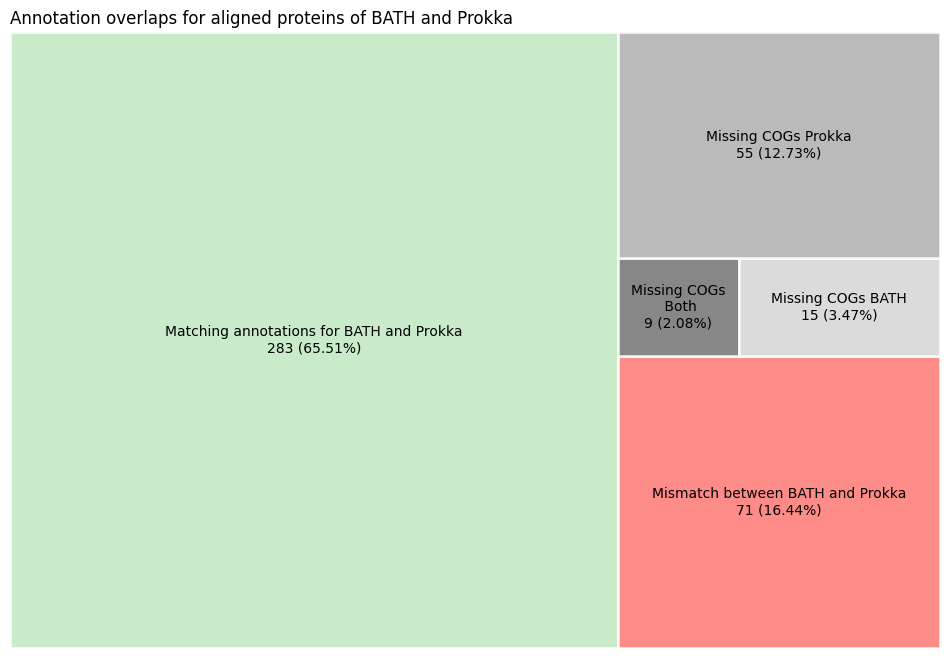

In [37]:
import matplotlib.pyplot as plt
import squarify

# Data
total = 432
categories = [
    'Matching annotations for BATH and Prokka',
    'Mismatch between BATH and Prokka',
    'Missing COGs\n Both',
    'Missing COGs BATH',
    'Missing COGs Prokka'
]
values = [283, 71, 9, 15, 55]

# Calculate percentages
percentages = [value / total * 100 for value in values]

# Create labels with percentages
labels = [f'{cat}\n{val} ({perc:.2f}%)' for cat, val, perc in zip(categories, values, percentages)]

# Plot the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=values, label=labels, alpha=0.8, color=['#BDE7BD', '#FD706B', '#696969', '#D3D3D3', '#A9A9A9'], edgecolor="white", linewidth=2)

plt.title('Annotation overlaps for aligned proteins of BATH and Prokka',loc='left')
plt.axis('off')  # Hide axes
plt.show()


In [56]:
alignment_overlaps.to_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/Alignment_Overlaps_Unique_Bedmap_COG_Matches.xlsx")

In [57]:
alignment_overlaps = pd.read_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/Alignment_Overlaps_Unique_Bedmap_COG_Matches.xlsx")

In [60]:
alignment_overlaps.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Prokka', 'BATH', 'label',
       'Annotation_Match', 'Prokka COGs', 'BATH COGs', 'Name_or_COG_Match'],
      dtype='object')

     Unnamed: 0.1  Unnamed: 0  \
0               0         443   
1               1         444   
2               2         445   
3               3         446   
4               4         447   
..            ...         ...   
428           428         944   
429           429         945   
430           430         947   
431           431         948   
432           432         950   

                                                Prokka  \
0    k127_1013475\t28\t825\tCKDIDOFJ_00001\t+\tab i...   
1    k127_1013475\t904\t2010\tCKDIDOFJ_00002\t+\tab...   
2    k127_1013475\t2108\t3613\tCKDIDOFJ_00003\t+\ta...   
3    k127_1013475\t3678\t3914\tCKDIDOFJ_00004\t+\ta...   
4    k127_1013475\t3944\t5182\tCKDIDOFJ_00005\t+\ta...   
..                                                 ...   
428  k127_795063\t28173\t29489\tCKDIDOFJ_01702\t+\t...   
429  k127_795063\t36632\t37219\tCKDIDOFJ_01711\t+\t...   
430  k127_795063\t45264\t46460\tCKDIDOFJ_01720\t+\t...   
431  k127_795063\t46484

<ipython-input-62-937abea8e243>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Name_or_COG_Match', y='Shifts', data=alignment_overlaps, palette="Set2")


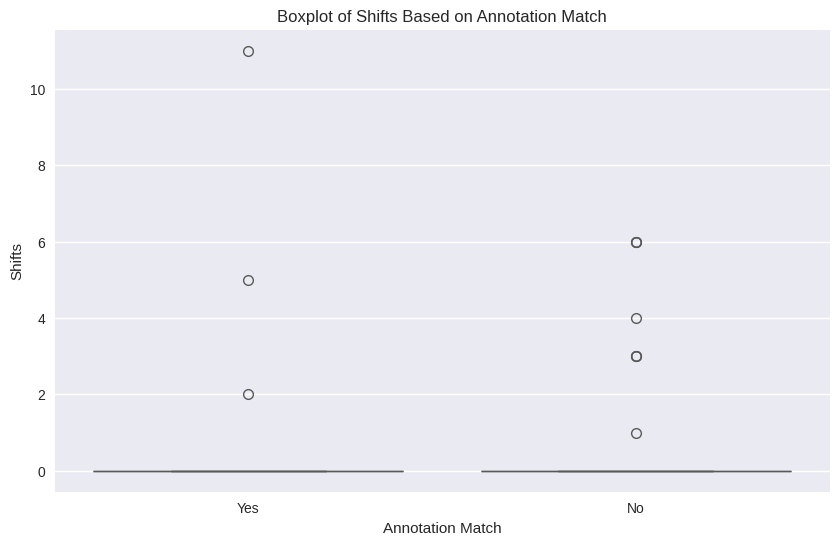

In [62]:
alignment_overlaps['Shifts'] = alignment_overlaps['BATH'].apply(lambda x: int(x.split('\t')[-1]))

# Display the DataFrame to verify the new column
print(alignment_overlaps)

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Name_or_COG_Match', y='Shifts', data=alignment_overlaps, palette="Set2")

# Add title and labels
plt.title('Boxplot of Shifts Based on Annotation Match')
plt.xlabel('Annotation Match')
plt.ylabel('Shifts')

# Display the plot
plt.show()

### Alignment length for overlaping annotations and names

In [22]:
filter1_alignments = alignments.dropna()

In [23]:
alignment_overlaps.loc[alignment_overlaps['Name_or_COG_Match'] == 'Yes']

,Unnamed: 0.1,Unnamed: 0,Prokka,BATH,label,Annotation_Match,Prokka COGs,BATH COGs,Name_or_COG_Match
0,0,443,k127_1013475\t28\t825\tCKDIDOFJ_00001\t+\tab i...,k127_1013475\t4\t822\tMF_01397\t+\t0,BATH and Prokka Annotated,No,COG0649,COG0649,Yes
3,3,446,k127_1013475\t3678\t3914\tCKDIDOFJ_00004\t+\ta...,k127_1013475\t3675\t3908\tMF_00530\t+\t0,BATH and Prokka Annotated,Yes,KOG1758,KOG1758,Yes
4,4,447,k127_1013475\t3944\t5182\tCKDIDOFJ_00005\t+\ta...,k127_1013475\t4421\t5059\tMF_01393\t+\t0,BATH and Prokka Annotated,Yes,COG0356,COG0356,Yes
6,6,449,k127_1013475\t5733\t6248\tCKDIDOFJ_00007\t+\ta...,k127_1013475\t5724\t6218\tMF_01398\t+\t0,BATH and Prokka Annotated,No,COG0711,COG0711,Yes
10,10,453,k127_1013475\t9558\t10445\tCKDIDOFJ_00011\t+\t...,k127_1013475\t9582\t10058\tMF_01351\t+\t0,BATH and Prokka Annotated,Yes,KOG3256,KOG3256,Yes
...,...,...,...,...,...,...,...,...,...
426,426,942,k127_795063\t23227\t25020\tCKDIDOFJ_01698\t+\t...,k127_795063\t24490\t24819\tQ9JZ44\t+\t0,BATH and Prokka Annotated,Yes,NaN,NaN,Yes
427,427,943,k127_795063\t25255\t26043\tCKDIDOFJ_01699\t+\t...,k127_795063\t25267\t25986\tMF_01274\t+\t0,BATH and Prokka Annotated,No,COG1521,COG1521,Yes
429,429,945,k127_795063\t36632\t37219\tCKDIDOFJ_01711\t+\t...,k127_795063\t36635\t37210\tQ46948\t+\t0,BATH and Prokka Annotated,Yes,COG0693,COG0693,Yes
430,430,947,k127_795063\t45264\t46460\tCKDIDOFJ_01720\t+\t...,k127_795063\t45273\t46430\tP0DPE4\t+\t0,BATH and Prokka Annotated,Yes,NaN,NaN,Yes


In [24]:
def get_alignment_lengths_with_colors(df):
    index = []
    prokka_alignment_size = []
    bath_alignment_size = []
    colors = []

    for i, r in df.iterrows():
        color = "blue"
        prokka_row_list = r['Prokka'].split("\t")
        if len(prokka_row_list) >= 3:
            prokka_size = abs(int(prokka_row_list[1]) - int(prokka_row_list[2]))
            prokka_alignment_size.append(prokka_size)
            index.append(i)
            if "UniProtKB" in r['Prokka']:
                color = "grey"
            elif "HAMAP" in r['Prokka']:
                color = "green"
            elif "ISfinder" in r['Prokka']:
                color = "red"

        else:
            print(f"Skipping row {i} due to insufficient elements in 'Prokka'. Prokka content: {r['Prokka']}")
            continue

        bath_row_list = r['BATH'].split("\t")
        if len(bath_row_list) >= 3:
            bath_size = abs(int(bath_row_list[1]) - int(bath_row_list[2]))
            bath_alignment_size.append(bath_size)
        else:
            bath_alignment_size.append(None)
            print(f"Skipping BATH part of row {i} due to insufficient elements. BATH content: {r['BATH']}")
        colors.append(color)

    assert len(prokka_alignment_size) == len(bath_alignment_size) == len(colors), "List sizes do not match."

    return prokka_alignment_size, bath_alignment_size, colors


prokka_alignsize, bath_alignsize, colors = get_alignment_lengths_with_colors(alignment_overlaps.loc[alignment_overlaps['Name_or_COG_Match'] == 'Yes'])

<ipython-input-25-68f36916685c>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


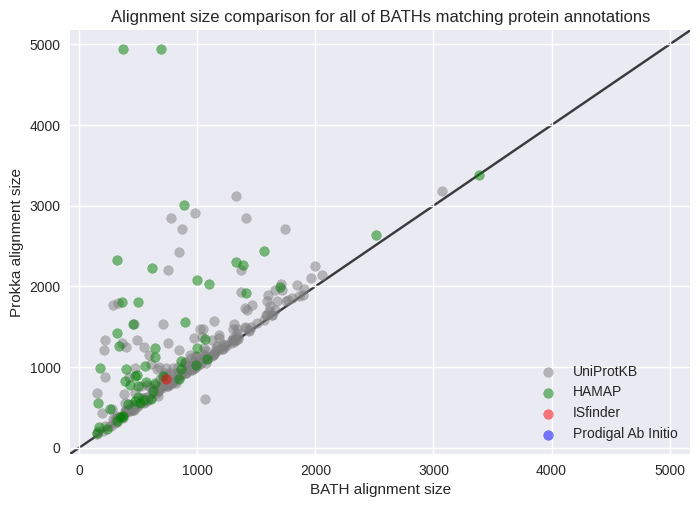

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn")

categories = ['UniProtKB', 'HAMAP', 'ISfinder', 'Others']
colors_map = {'UniProtKB': 'grey', 'HAMAP': 'green', 'ISfinder': 'red', 'Prodigal Ab Initio': 'blue'}

for category, color in colors_map.items():
    mask = np.array(colors) == color
    plt.scatter(np.array(bath_alignsize)[mask], np.array(prokka_alignsize)[mask], color=color, alpha=0.5, label=category)

plt.xlabel('BATH alignment size')
plt.ylabel('Prokka alignment size')
plt.title('Alignment size comparison for all of BATHs matching protein annotations')

lims = [
    np.min([plt.gca().get_xlim(), plt.gca().get_ylim()]),
    np.max([plt.gca().get_xlim(), plt.gca().get_ylim()]),
]
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
plt.show()

In [26]:
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/Lab Work/Parkinsons_Data/Organized/Alignment_Overlaps_Unique_Bedmap_COG_Matches.xlsx")

In [27]:
data

,Unnamed: 0.1,Unnamed: 0,Prokka,BATH,label,Annotation_Match,Prokka COGs,BATH COGs,Name_or_COG_Match
0,0,443,k127_1013475\t28\t825\tCKDIDOFJ_00001\t+\tab i...,k127_1013475\t4\t822\tMF_01397\t+\t0,BATH and Prokka Annotated,No,COG0649,COG0649,Yes
1,1,444,k127_1013475\t904\t2010\tCKDIDOFJ_00002\t+\tab...,k127_1013475\t985\t2001\tMF_01350\t+\t0,BATH and Prokka Annotated,No,COG1005,KOG4770,No
2,2,445,k127_1013475\t2108\t3613\tCKDIDOFJ_00003\t+\ta...,k127_1013475\t2114\t3589\tMF_01347\t+\t0,BATH and Prokka Annotated,No,COG0055,KOG1350,No
3,3,446,k127_1013475\t3678\t3914\tCKDIDOFJ_00004\t+\ta...,k127_1013475\t3675\t3908\tMF_00530\t+\t0,BATH and Prokka Annotated,Yes,KOG1758,KOG1758,Yes
4,4,447,k127_1013475\t3944\t5182\tCKDIDOFJ_00005\t+\ta...,k127_1013475\t4421\t5059\tMF_01393\t+\t0,BATH and Prokka Annotated,Yes,COG0356,COG0356,Yes
...,...,...,...,...,...,...,...,...,...
428,428,944,k127_795063\t28173\t29489\tCKDIDOFJ_01702\t+\t...,k127_795063\t28182\t29378\tP9WFP3\t+\t0,BATH and Prokka Annotated,No,COG4536,COG1253,No
429,429,945,k127_795063\t36632\t37219\tCKDIDOFJ_01711\t+\t...,k127_795063\t36635\t37210\tQ46948\t+\t0,BATH and Prokka Annotated,Yes,COG0693,COG0693,Yes
430,430,947,k127_795063\t45264\t46460\tCKDIDOFJ_01720\t+\t...,k127_795063\t45273\t46430\tP0DPE4\t+\t0,BATH and Prokka Annotated,Yes,NaN,NaN,Yes
431,431,948,k127_795063\t46484\t47611\tCKDIDOFJ_01721\t+\t...,k127_795063\t46493\t47560\tP06710\t+\t0,BATH and Prokka Annotated,Yes,COG2812,COG2812,Yes


In [28]:
prokka_alignsize, bath_alignsize, colors = get_alignment_lengths_with_colors(alignment_overlaps.loc[alignment_overlaps['Name_or_COG_Match'] == 'Yes'])

In [29]:
len(prokka_alignsize)

283

In [30]:
alignment_overlaps[alignment_overlaps['Name_or_COG_Match'] == 'Yes']['Prokka alignsize'] = prokka_alignsize
alignment_overlaps[alignment_overlaps['Name_or_COG_Match'] == 'Yes']['BATH alignsize'] = bath_alignsize

<ipython-input-30-2983f331bc29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alignment_overlaps[alignment_overlaps['Name_or_COG_Match'] == 'Yes']['Prokka alignsize'] = prokka_alignsize
<ipython-input-30-2983f331bc29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alignment_overlaps[alignment_overlaps['Name_or_COG_Match'] == 'Yes']['BATH alignsize'] = bath_alignsize


In [31]:
# First, ensure your index list matches the filtered DataFrame's index where 'Name_or_COG_Match' is 'Yes'
filtered_index = alignment_overlaps[alignment_overlaps['Name_or_COG_Match'] == 'Yes'].index

# Assign 'prokka_alignsize' and 'bath_alignsize' using .loc on the filtered index
alignment_overlaps.loc[filtered_index, 'Prokka alignsize'] = prokka_alignsize
alignment_overlaps.loc[filtered_index, 'BATH alignsize'] = bath_alignsize


In [32]:
alignment_overlaps.sort_values('Prokka alignsize',ascending=False).to_excel("Size.xlsx")

### Frameshifts of overlapping annotations

In [37]:
alignment_overlaps['Name_or_COG_Match'].value_counts()

Name_or_COG_Match
No    5
Name: count, dtype: int64

<ipython-input-71-e9e00aae2177>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Category', y='Shifts', data=alignment_overlaps, jitter=True, palette={'UniProtKB': 'grey', 'HAMAP': 'green', 'ISfinder': 'red', 'Others': 'blue'})


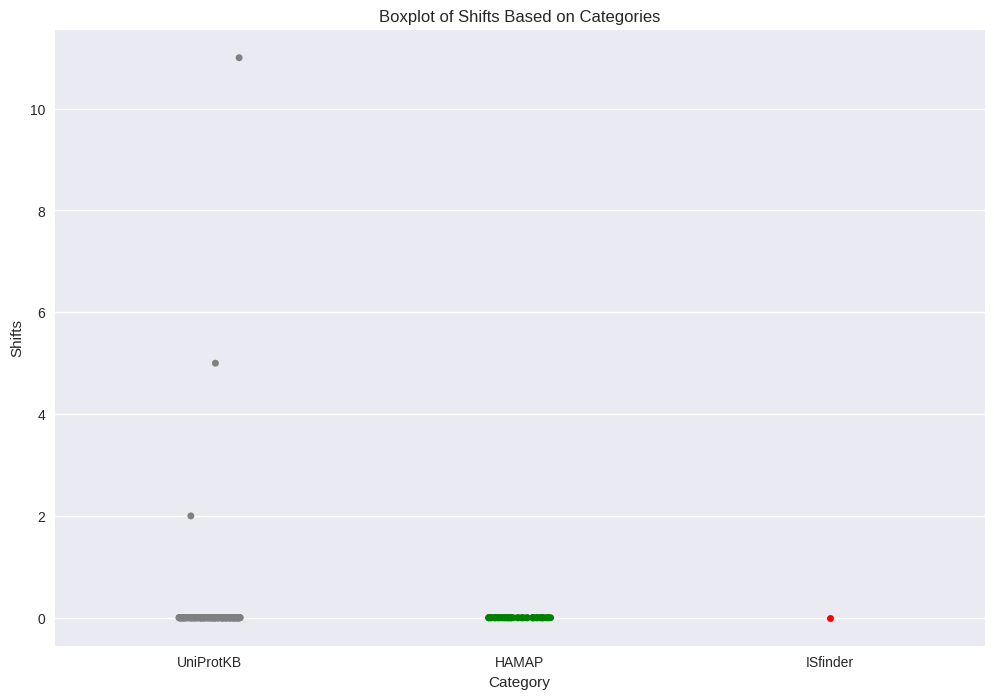

In [71]:
prokka_alignsize, bath_alignsize, colors = get_alignment_lengths_with_colors(alignment_overlaps.loc[alignment_overlaps['Name_or_COG_Match'] == 'Yes'])

# Add colors to the original DataFrame
alignment_overlaps.loc[alignment_overlaps['Name_or_COG_Match'] == 'Yes', 'Color'] = colors

# Map colors to categories
category_map = {'grey': 'UniProtKB', 'green': 'HAMAP', 'red': 'ISfinder', 'blue': 'Others'}
alignment_overlaps['Category'] = alignment_overlaps['Color'].map(category_map)

# Splitting the 'BATH' column by tab and taking the last part to create 'Shifts'
alignment_overlaps['Shifts'] = alignment_overlaps['BATH'].apply(lambda x: int(x.split('\t')[-1]))

# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.stripplot(x='Category', y='Shifts', data=alignment_overlaps, jitter=True, palette={'UniProtKB': 'grey', 'HAMAP': 'green', 'ISfinder': 'red', 'Others': 'blue'})

# Add title and labels
plt.title('Boxplot of Shifts Based on Categories')
plt.xlabel('Category')
plt.ylabel('Shifts')

# Display the plot
plt.show()